#**Ch02. 사이킷런으로 시작하는 머신러닝**

##**01. 사이킷런 소개와 특징**
사이킷런(scikit-learn) : 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리


  **특징**
- 파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 쉽고 가장 파이썬스러운 API를 제공
- 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API를 제공
- 오랜 기간 실전 환경에서 검증됐으며, 매우 많은 환경에서 사용되는 성숙한 라이브러리



In [ ]:
#pip 이용
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn
print(sklearn.__version__)  #버전 확인

1.0.2


##**02. 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기**
- 분류(classification) : 대표적인 지도학습 supervised learning 방법
  - 지도학습(supervised learning) : 학습을 위한 다양한 피처와 분류 결정값인 Label 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블 예측, 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식
    - 학습 데이터 세트 : 학습을 위해 주어진 데이터 세트
    - 테스트 데이터 세트 : 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트
- 사이킷런 패키지 내의 모듈명은 sklearn으로 시작
  - sklearn.datasets : 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임
  - sklearn.tree : 트리 기반 ML알고리즘을 구현한 클래스의 모임
  - sklearn.model_selection : 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임
    - 하이퍼 파라미터 : 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들을 통칭하며, 하이퍼 파라미터를 통해 머신러닝 알고리즘의 성능을 튜닝할 수 있음
- 붓꽃 데이터 세트를 생성하는 데는 load_iris()를 이용하며, ML 알고리즘 의사 결정 트리 Decision Tree 알고리즘으로, 이를 구현한 DecisionTreeClassifier 를 적용
  - 의사 결정 트리 : 데이터를 학습하고 예측하는 머신러닝 기법을 구현한 주요 알고리즘

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

#붓꽃 데이터 세트 로딩
iris = load_iris()

#iris.data는 Iris 데이터 세트에서 feature 만으로 된 데이터를 numpy로 갖고 있음
iris_data = iris.data

#iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 갖고 있음
iris_label = iris.target
print('iris target 값: ', iris_label)
print('iris target 명: ', iris.target_names)

#붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target 값:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명:  ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


- feature : `sepal length`, `sepal width`, `petal length`, `petal width`
- label(레이블) : 0,1,2, 품종
  - 0: `setosa`, 1: `versicolor`, 2: `virginica`

- 학습용 데이터와 테스트용 데이터 분리
  - 반드시 분리해야 됨
  - 학습 데이터로 학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가하려면 테스트 데이터 세트가 필요하기 때문
  - `train_test_split()` : 학습 데이터와 테스트 데이터를 `test_size` 파라미터 입력 값의 비율로 쉽게 분할
    - 첫번째 파라미터 : 피처 데이터 세트
    - 두번째 파라미터 : 레이블 데이터 세트
    - `test_size` : 전체 데이터 세트 중 테스트 데이터 세트의 비율
    - `random_state` : 호출할 때마다 같은 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 발생값, seed와 같은 의미로 숫자 상관 없음
      - 무작위로 데이터를 분리하므로 random_state을 지정하지 않으면 수행할 때마다 다른 학습/테스트용 데이터를 만들 수 있음

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)
#학습용 피처 데이터 세트를 X_train으로, 테스트용 피처 데이터 세트를 X_test로, 학습용 레이블 데이터 세트를 y_train으로, 테스트용 레이블 데이터 세트를 y_test로 반환

- **의사 결정 트리 (DecisionTreeClassifier)**
  - 예측은 반드시 학습 데이터가 아닌 다른 데이터를 이용해야 함, 일반적으로 테스트 데이터 세트 이용
  - `fit()` : 학습용 피처 데이터 속성과 결정값 데이터 세트를 입력해 호출하면 학습 수행
  - `predict()` : 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값 반환

In [ ]:
#DecisionTreeClassfier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

#학습 수행
dt_clf.fit(X_train, y_train) #train 데이터

DecisionTreeClassifier(random_state=11)

In [ ]:
#학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test) #test 데이터

- **예측 성능 평가**
  - 일반적으로 머신러닝 모델의 성능 평가 방법은 여러 가지가 있으나, 여기서는 정확도를 측정
    - **정확도** : 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표
    - `accuracy_score()` : 첫번째 파라미터로 실제 레이블 데이터 세트, 두번째 파라미터로 예측 레이블 데이터 세트 입력하면 정확도 측정

In [ ]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


> **1. 데이터 세트 분리** : 데이터를 학습 데이터와 테스트 데이터로 분리\
**2. 모델 학습** : 학습 데이터를 기반으로 ML알고리즘을 적용해 모델을 학습시킴\
**3. 예측 수행** : 학습된 ML 모델을 이용해 테스트 데이터의 분류(즉, 붓꽃 종류)를 예측함\
**4. 평가** : 이렇게 예측된 결괏값과 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가함




##**03. 사이킷런의 기반 프레임워크 익히기**


#### **Estimator 이해 및 fit(), predict()메서드**
- `fit()` : ML 모델 학습, `predict()` : 학습된 모델의 예측
- `Estimator` : Classifier, Regressor
  - `Classifier` : 분류 알고리즘을 구현한 클래스
  - `Regressor` : 회귀 알고리즘을 구현한 클래스
  - `Estimator` 클래스는 fit() 과 predict()를 내부에서 구현함
  - `cross_val_score()`와 같은 evaluation 함수, `GridSearchCV`와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스의 경우 이 `Estimator`를 인자로 받음
  - 인자로 받은 `Estimator`에 대해서 `cross_val_score()`, `GridSearchCV.fit()`함수 내에서 이 `Estimator`의 `fit()`과 `predict()`를 호출해 평가를 하거나 하이퍼 파라미터 튜닝 수행
- 사이킷런에서 비지도학습인 차원 축소, 클러스터링, 피처 추출 등을 구현한 클래스 역시 대부분 `fit()`과 `transform()`을 적용
  - `fit()` : 비지도학습과 피처 추출에서 fit()은 지도학습의 fit()과 같이 학습을 의미하는 것이 아니라 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업
  - `transform()` : 이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업 수행
  - `fit_transform()` : fit()과 transform()을 하나로 결합한 fit_transform()도 함께 제공, 별도로 호출할 필요를 줄여주지만 사용에 약간 주의 필요


####**사이킷런의 주요 모듈**

|분류|모듈명|설명|
|---|---|---|
|예제 데이터|sklearn.datasets|사이킷런에 내장되어 예제로 제공하는 데이터 세트|
|피처 처리|skleran.preprocessing|데이터 전처리에 필요한 다양한 가공 기능 제공(문자열을 숫자형 코드 값으로 인코딩, 정규화, 스케일링 등|
||sklearn.feature_selection|알고리즘에 큰 영향을 미치는 피처를 우선순위대로 셀렉션 작업을 수행하는 다양한 기능 제공|
||sklearn.feature_extraction|텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출하는 데 사용됨.예를 들어 텍스트 데이터에서 count vectorizer나 tf-idf vectorizer 등을 생성하는 기능 제공. 텍스트 데이터의 피처 추출은 sklearn.feature_extraction.text 모듈에, 이미지 데이터의 피처 추출은 sklearn.feature_extraction.image 모듈에 지원 API가 있음
|피처 처리&차원 축소|sklearn.decomposition|차원 축소와 관련한 알고리즘을 지원한느 모듈임. PCA, NMF, Truncated SVD 등을 통해 차원 축소 기능을 수행할 수 있음
|데이터 분리,검증& 파라미터 튜닝| sklearn.model_selection|교차 검즈을 위한 학습용/테스트용 분리, 그리드 서치(Grid Search)로 최적 파라미터 추출 등의 API 제공|
|평가|sklearn.metrics|분류, 회귀, 클러스터링, 페어와이즈에 대한 다양한 성능 측정 방법 제공. Accuracy, Precision, Recall, ROC-AUC, RMSE 등 제공|
|ML 알고리즘|sklearn.ensemble|앙상블 알고리즘 제공/ 랜덤 포레스트, 에이다부스트, 그래디언트 부스팅 등을 제공|
||sklearn.linear_model|주로 선형 회귀, 릿지(Ridge),라쏘(Lasso) 및 로지스틱 회귀 등 회귀 관련 알고리즘을 지원. 또한 SGD(Stochastic Gradient Descent)관련 알고리즘도 제공|
||sklearn.naive_bayes|나이브 베이즈 알고리즘 제공. 가우시안 NB, 다항 분포 NB 등|
||skleran.neighbors|최근접 이웃 알고리즘 제공, K-NN 등|
||sklearn.svm|서포트 벡터 머신 알고리즘 제공|
||sklearn.tree|의사 결정 트리 알고리즘 제공|
||sklearn.cluster|비지도 클러스터링 알고리즘 제공(K-평균, 계층형, DBSCAN 등)|
|유틸리티|sklearn.pipeline|피처 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 함께 묶어서 실행할 수 있는 유틸리티 제공|



####**내장된 예제 데이터 세트**
- 사이킷런에는 별도의 외부 웹사이트에서 데이터 세트를 내려받을 필요 없이 예제로 활용할 수 있는 간단하면서도 좋은 데이터 세트가 내장돼있음, datasets 모듈에 있는 여러 API를 호출해 만들 수 있음
- 분류나 회귀 연습용 예제 데이터

|API명|설명|
|---|---|
|datasets.load_boston()|회귀 용도이며, 미국 보스턴의 집 피처들과 가격에 대한 데이터 세트|
|datasets.load_breast_cancer()|분류 용도이며, 위스콘신 유방암 피처들과 악성/음성 레이블 데이터 세트|
|datasets.load_diabetes()|회귀 용도이며, 당뇨 데이터 세트|
|datasets.load_digits()|분류 용도이며, 0에서 9까지 숫자의 이미지 픽셀 데이터 세트|
|datasets.load_iris()|분류 용도이며, 붓꽃에 대한 피처를 가진 데이터 세트|



- fetch 계열의 명령은 데이터의 크기가 커서 패키지에 처음부터 저장돼 있지 않고 인터넷에서 내려받아 홈 디렉터리 아래의 scikit_learn_data라는 서브 디렉터리에 저장한 후 추후 불러들이는 데이터, 최초 사용 시에 인터넷에 연결돼 있지 않으면 사용할 수 없음 
  - fetch_covtype(): 회귀 분석용 토지 조사 자료
  - fetch_20newsgroups() : 뉴스 그룹 텍스트 자료
  - fetch_olivetti_faces() : 얼굴 이미지 자료
  - fetch_lfw_people() : 얼굴 이미지 자료
  - fetch_lfw_pairrs() : 얼굴 이미지 자료
  - fetch_rcv1() : 로이터 뉴스 말뭉치
  - fetch_mldata() : ML 웹사이트에서 다운로드
- 분류와 클러스터링을 위한 표본 데이터 생성기
  - datasets.make_classification() : 분류를 위한 데이터 세트 만듦, 특히 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성해줌
  - datasets.make_blobs() : 클러스터링을 위한 데이터 세트를 무작위로 생성해줌, 군집 지정 개수에 따라 여러 가지 클러스터링을 위한 데이터 세트를 쉽게 만들어줌
- 사이킷런에 내장된 데이터 세트는 일반적으로 딕셔너리 형태로 돼잇음 
  - 키는 보통 data, target, target_name, feature_names, DESCR
    - data는 피처의 데이터 세트를 가리킴
    - target은 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트
    - target_names는 개별 레이블의 이름을 나타냄
    - feature_names는 피처의 이름을 나타냄
    - DESCR은 데이터 세트에 대한 설명과 각 피처의 설명을 나타냄
    - data, target은 넘파이 배열 타입이며, target_names, feature_names는 넘파이 배열 또는 파이썬 리스트 타입임, DESCR 은 스트링 타입

In [ ]:
#피터의 데이터 값을 반환받기 위해서는 내장 데이터 세트 API를 호출한 뒤에 그 key 값을 지정하면 됨
from sklearn.datasets import load_iris
iris_data = load_iris()
print(type(iris_data))    #Bunch 클래스는 파이썬 딕셔너리 자료형과 유사

<class 'sklearn.utils.Bunch'>


In [ ]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


- 데이터 키는 피처들의 데이터 값 가리킴, 데이터 세트가 딕셔너리 형태이기 때문에 피터 데이터값을 추출하기 위해서는 데이터 세트.data 혹은 ['data']를 이용하면 됨, 마찬가지로 target, feature_names, DESCR key가 가리키는 데이터 값의 추출도 동일하게 수행하면 됨

In [ ]:
print('\n feature_names 의 type:', type(iris_data.feature_names))
print('feature_names 의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.target_names))
print('target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type:', type(iris_data.data))
print('data의 shape:', iris_data.data.shape)
print(iris_data.data)

print('\n target의 type:', type(iris_data.target))
print('target_namesdml shape:', iris_data.target.shape)
print(iris_data.target)


 feature_names 의 type: <class 'list'>
feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

 data의 type: <class 'numpy.ndarray'>
data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.

##**04. Model Selection 모듈 소개**
- 사이킷런의 model_selection 모듈은 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가, 그리고 Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공

####**학습/테스트 데이터 세트 분리 - train_test_split()**

테스트 데이터 세트를 이용하지 않고 학습 데이터 세트로만 학습 후 예측하면 생기는 문제


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

#학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))

#테스트 데이터 세트를 이용하지 않고 학습 데이터 세트로만 학습하고 예측하면 정확도가 100%가 나옴

예측 정확도: 1.0


**`train_test_split()`** : sklearn.model_selection에서 로드
  - 첫번째 파라미터로 피처 데이터 세트, 두번째 파라미터로 레이블 데이터 세트 입력받음
  - `test_size` : 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정함, 디폴트는 0.25
  - `train_size` : 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링할 것이나 결정, test_size parameter를 통상적으로 사용하기 때문에 잘 사용하지 않음
  - `shuffle` : 데이터를 분리하기 전에 데이터를 미리 섞을지 결정, 디폴트는 True, 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용
  - `random_state` : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값
  - 반환값은 튜플 형태, 순차적으로 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트가 반환됨

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

df_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.3, random_state = 121)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))
#학습을 위한 데이터의 양을 일정 수준 이상으로 보장하는 것도 중요하지만, 학습된 모델에 대해 다양한 데이터를 기반으로 예측 성능을 평가해보는 것도 매우 중요

예측 정확도: 0.9556


####**교차 검증**
- 별도의 테스트용 데이터를 사용하는 방법 역시 과적합에 취약한 약점을 가질 수 있음 -> 개선하기 위해 교차검증을 이용해 더 다양한 학습과 평가 수행
  - 과적합 : 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것
- 교차검증 : 이러한 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것, 각 세트에서 수행한 평가 결과에 따라 하이퍼 파라미터 튜닝 등의 모델 최적화를 더 손쉽게 할 수 있음
  - 대부분의 ML 모델의 성능 평가는 교차 검증 기반으로 1차 평가를 한 뒤에 최종적으로 테스트 데이터 세트에 적용해 평가하는 프로세스



#####**K 폴드 교차 검증**
- 가장 보편적으로 사용되는 교차 검증 기법, K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행하는 방법
KFold와 StratifiedKFold 클래스 제공

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
df_clf = DecisionTreeClassifier(random_state=156)

#5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기: ', features.shape[0])  #전체 iris 데이터는 모두 150개, 따라서 학습용 데이터 세트 120개 테스트 데이터 세트 30개로 분할됨

붓꽃 데이터 세트 크기:  150


- KFold 객체는 split()을 호출하면 학습용/검증용 데이터로 분할할 수 있는 인덱스를 반환함
- 실제로 학습용/검증용 데이터 추출은 반환된 인덱스를 기반으로 개발 코드에서 직접 수행해야함

In [ ]:
n_iter = 0

#KFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  #학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1

  #반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred),4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

  #개별 iteration 별 정확도를 합하여 평균 정확도 계산
  print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도: 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

## 평균 검증 정확도: 1.0

#2 교차 검증 정확도: 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

## 평균 검증 정확도: 1.0

#3 교차 검증 정확도: 0.9, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

## 평균 검증 정확도: 0.9666666666666667

#4 교차 검증 정확도: 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

## 평균 검증 정확도: 0.958325

#5 교차 검증 정확도: 0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.91332


#####**Stratified K 폴드**
- Stratified K 폴드 : 불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식
  - 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한 쪽으로 치우치는 것
  - K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해줌
  - 이를 위해 Stratified K 폴드는 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배함

In [ ]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [ ]:
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포 : \n', label_train.value_counts())
  print('검증 레이블 데이터 분포 : \n', label_test.value_counts())
  iris_df['label'].value_counts()

## 교차 검증: 1
학습 레이블 데이터 분포 : 
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포 : 
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포 : 
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
 2    50
Name: label, dtype: int64


- 교차 검증 시마다 3개의 폴드 세트로 만들어지는 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출됐음, 예를 들어 학습 레이블은 1,2 밖에 없으므로 0의 경우는 전혀 학습하지 못하므로 예측하지 못함
- StratifiedKFold 를 사용하는 방법은 KFold를 사용하는 방법과 거의 비슷, 단 하나 큰 차이는 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 split() 메서드에 인자로 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 필요

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter +=1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

  # 학습 레이블과 검증 레이블 데이터 값의 분포가 동일하게 할당됐음

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

#StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
  #split()으로 반환도니 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  #학습 및 예측
  dt_clf.fit(X_train,y_train)
  pred = dt_clf.predict(X_test)

  #반복시마다 정확도 측정
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test,pred),4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

  #교차 검증별 정확도 및 평균 정확도 계산
  print('\n## 교차 검증별 정확도 : ', np.round(cv_accuracy,4))
  print('## 평균 검증 정확도 :', np.mean(cv_accuracy))


#1 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

## 교차 검증별 정확도 :  [0.98]
## 평균 검증 정확도 : 0.98

#2 교차 검증 정확도: 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

## 교차 검증별 정확도 :  [0.98 0.94]
## 평균 검증 정확도 : 0.96

#3 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도 :  [0.98 0.94 0.98]
## 평균 검증 정확도 : 0.9666666666666667


- 왜곡된 레이블 데이터 세트에서는 반드시 Stratified K 폴드를 이용해 교차 검증해야함
- 회귀에서는 지원되지 않음, 회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문에 결정값별로 분포를 정하는 의미가 없기 때문

#####**교차 검증을 보다 간편하게-cross_val_score()**

- KFold
 1. 폴드 세트를 설정
 2. for루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출
 3. 반복적으로 예측을 수행하고 에측 성능을 반환

- `cross_val_score()` : 한꺼번에 수행해주는 API


```
cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, vervose=0, fit_params=None, pre_dispatch='2*n_jobs')
```
 - estimator : 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor
 - X : 피처 데이터 세트
 - y : 레이블 데이터 세트
 - scoring : 예측 성능 평가 지표
 - cv : 교차 검증 폴드 수
 - 반환값 : scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환
 - classifier : StratifiedKFold 방식으로 분할, regressor : KFold 방식으로 분할

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data=load_iris()
dt_clf=DecisionTreeClassifier(random_state=156)

data=iris_data.data
label=iris_data.target

#성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores=cross_val_score(dt_clf, data, label, scoring='accuracy',cv=3)
print('교차 검증별 정확도:', np.round(scores,4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

#StratifiedKFold의 결과값과 같음

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


- cross_validate() : 여러 개의 평가 지표를 반환, 학습 데이터에 대한 성능 평가 지표와 수행 시간도 같이 제공
- 일반적으로 cross_val_score() 사용



####**GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에**
- 하이퍼 파라미터 : 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측 성능을 개선할 수 있음
- 사이킷런은 GridSearchCV API를 이용해 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안 제공 but 수행시간이 상대적으로 오래 걸림
  - estimator : classifier, regressor, pipeline이 사용될 수 잇음
  - param_grid : key + 리스트 값을 가지는 딕셔너리가 주어짐, estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정
  - scoring : 예측 성능을 측정할 평가 방법을 지정, 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열(ex- accuracy)로 지정하나 별도의 성능 평가 지표 함수 지정 가능
  - cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정
  - refit : 디폴트가 True이며 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼파라미터로 재학습시킴

In [ ]:
# 결정 트리 알고리즘의 여러 하이퍼 파라미터를 순차적으로 변경하면서 최고 성능을 가지는 파라미터 조합을 찾고자 한다면 다음과 같이 파라미터의 집합을 만들고 이를 순차적으로 적용하면서 최적화 수행 가능
grid_parameters = {'max_depth':[1,2,3],
                   'min_samples_split':[2,3]}

- 하이퍼 파라미터는 다음과 같이 순차적으로 적용되며, 총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실행하면서 최적의 파라미터와 수행 결과를 도출할 수 있음

순번 | max_depth | min_samples_split
:--:|:--:|:--:
1|1|2
2|1|3
3|2|2
4|2|3
5|3|2
6|3|3

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

#파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [ ]:
import pandas as pd

#param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정
#refit=True 가 default임 True이면 가장 좋은 파라미터 설정으로 재학습시킴
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv=3, refit=True)

#붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

#GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


  - params : 수행할 때마다 적용된 개별 하이퍼 파라미터 값
  - rank_test_score : 하이퍼 파라미터별로 성능이 좋은 score 순위를 나타냄, 1이 가장 뛰어난 순위이며 이때의 파라미터가 최적의 하이퍼 파라미터
  - mean_test_score : 개별 하이퍼 파라미터별로 cv의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값

In [ ]:
#GridSearchCV 객체의 fit()을 수행하면 최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과 값이 각각 best_params_, best_score_속성에 기록됨
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9750


In [ ]:
#GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

#GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도 : 0.9667


##**05.데이터 전처리**
- ML 알고리즘은 데이터에 기발하고 있기 때문에 어떤 데이터를 입력으로 가지느냐에 따라 결과도 크게 달라질 수 있음 (Garbage in Garbage out)
- 결손값, 즉 NaN, Null 값 허용되지 않음 -> 다른 값으로 변환해야함
- 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않음 - 모든 문자열 값은 인코딩돼서 숫자형으로 변환해야 함
  - 문자열 피터는 일반적으로 카테고리형 피처와 텍스트형 피처 의미, 카테고리형 피처는 코드 값으로 표현하는 게 더 이해하기 쉬움
  - 텍스트형 피처는 피처 벡터화 등의 기법으로 벡터화 하거나 불필요한 피처라고 판단되면 삭제하는 것이 좋음



####**데이터 인코딩**


#####**레이블 인코딩(Label encoding)**
- 카테고리 피처를 코드형 숫자 값으로 변환하는 것
- LabelEncoder 클래스로 구현 - LabelEncoder를 객체로 생성한 후 fit()과 transform()을 호출해 레이블 인코딩 수행

In [ ]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값 : ', labels)

인코딩 변환값 :  [0 1 4 5 3 3 2 2]


In [ ]:
print('인코딩 클래스 :', encoder.classes_)
#어떤 값으로 인코딩 됐는지 확인 0부터

인코딩 클래스 : ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [ ]:
print('디코딩 원본값 : ', encoder.inverse_transform([4,5,2,0,1,1,3,3]))
#인코딩된 값 다시 디코딩

디코딩 원본값 :  ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


- 레이블 인코딩이 일괄적인 숫자값으로 변환 되면서 몇몇 ML알고리즘에는 이를 적용할 경우 예측 성능이 떨어지는 경우가 발생할 수 있음 - 숫자 값의 경우 크고 작음에 대한 특성이 작용하기 때문
- 선형 회귀와 같은 ML 알고리즘에는 적용하지 않아야 함
- 트리 계열의 알고리즘은 숫자의 특성 반영하지 않으므로 가능함


####**원-핫 인코딩(One-Hot Encoding)**
- 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식
- 행 형태로 돼있는 피처의 고유값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시
- OneHotEncoder 클래스로 쉽게 변환
  - 전에 모든 문자열 값이 숫자형 값으로 변환돼야 함
  - 입력 값으로 2차원 데이터가 필요

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

#먼저 숫자값으로 변환을 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

#2차원 데이터로 변경
labels = labels.reshape(-1,1)

#원핫 인코딩을 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원 핫 인코딩 데이터')
print(oh_labels.toarray())
print('원 핫 인코딩 데이터 차원')
print(oh_labels.shape)

원 핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원 핫 인코딩 데이터 차원
(8, 6)


- 판다스 get_dummies() : 원핫 인코딩 더 쉽게 지원, 문자열 카테고리 값을 숫자형으로 변환할 필요 없이 바로 변환할 수 있음

In [ ]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


####**피처 스케일링과 정규화**
- 피처 스케일링(feature scaling) : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업, 대표적으로 표준화와 정규화가 있음
  - **표준화(Standardization)** : 데이터의 피처 각각이 평균이 0 이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것, 원래 값에서 피처 x의 평균을 뺀 값을 피처 x의 표준편차로 나눈 값
  - **정규화(Normalization)** : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념, 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것, 원래 값에서 피처x의 최솟값을 뺀 값을 피처 x의 최댓값과 최솟값의 차이로 나눈 값
    - 사이킷런의 전처리에서 제공하는 Normalizer 모듈과 약간의 차이 있음, 사이킷런의 Normalizer모듈은 선형대수에서의 정규화 개념이 적용됐으며, 개별 벡터의 크기를 맞추기 위해 변환하는 것, 개별 벡터를 모든 피처 벡터의 크기로 나눠줌 - 벡터 정규화



#####**StandardScaler**
- 표준화를 쉽게 지원하기 위한 클래스, 개별 피처를 평균이 0이고 분산이 1인 값으로 변환해줌

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

#붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

#StandardScaler 객체 생성
scaler = StandardScaler()
#StandardScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#####**MinMaxScaler**
- 데이터값을 0과 1 사이의 범위 값으로 변환, 음수값이 있으면 -1에서 1값으로 변환, 데이터의 분포가 가우시안 분포가 아닐 경우에 적용해볼 수 있음

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 객체 생성
scaler = MinMaxScaler()

#MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 변환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature 들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


#####**학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점**
- StandarnScaler나 MinMaxScaler와 같은 Scaler 객체를 이용해 데이터의 스케일링 변화 시 fit(), transform(), fit_transform() 메소드 이용, 일반적으로 fit()은 데이터 변환을 위한 기준 정보 설정을 적용하며 transform()은 이렇게 설정된 정보를 이용해 데이터를 변환함, fit_transform()은 한꺼번에 수행함
- 주의할 점: Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야 함

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
#Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

#MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

#fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10 으로 설정
scaler.fit(train_array)

#1/10 scale로 train_array 데이터 변환함, 원본 10 -> 1로 변환됨
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터 :', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터 :', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [ ]:
#MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

#1/5 scale로 test_array 데이터 변환함 원본 5 ->1로 변환
test_scaled = scaler.transform(test_array)

#test_array의 scale 변환 출력
print('원본 test_array 데이터 : ', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터 : ', np.round(test_scaled.reshape(-1),2))

#학습 데이터와 테스트 데이터의 스케일링 맞지 않음

원본 test_array 데이터 :  [0 1 2 3 4 5]
Scale된 test_array 데이터 :  [0.  0.2 0.4 0.6 0.8 1. ]


In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터 :', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터 :', np.round(train_scaled.reshape(-1),2))

# fit() 호출하지 않고 transform()만으로 변환해야함
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터 : ', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터 : ', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터 :  [0 1 2 3 4 5]
Scale된 test_array 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5]


- fit_transform()을 적용할 때도 마찬가지 : test 데이터에는 절대 사용하면 안됨
1. 가능하다면 전체 데이터의 스테일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
2. 1이 여의치 않다면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환

##**06. 사이킷런으로 수행하는 타이타닉 생존자 예측**



* Passengerid : 탑승자 데이터 일련번호
* survived : 생존 여부, 0=사망, 1=생존
* pclass : 티켓의 선실 등급, 1=일등석, 2=이등석, 3=삼등석
* sex : 탑승자 성별
* name : 탑승자 이름
* Age : 탑승자 나이
* sibsp : 같이 탑승한 형제자매 또는 배우자 인원 수
* parch : 같이 탑승한 부모님 또는 어린이 인원수
* ticket : 티켓 번호
* fare : 요금
* cabin : 선실 번호
* embarked : 중간 정착 항구 C= Cherbourg, Q= Queenstown, S=Southampton



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

titanic_df=pd.read_csv('/content/drive/MyDrive/ESAA/22-2/DATA/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- RangeIndex : row 개수

In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [ ]:
print('Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [ ]:
#cabin 속성의 경우 앞글자만 추출
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


#####**성별에 따른 생존자 수**

In [ ]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

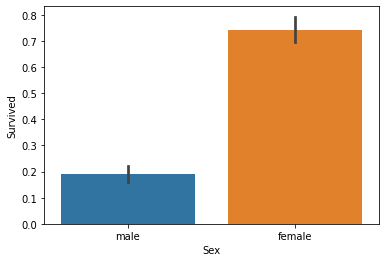

In [ ]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

#####**객실 등급별 성별에 따른 생존 확률**

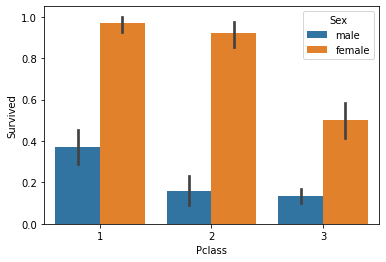

In [ ]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

#####**Age에 따른 생존 확률**

In [ ]:
#입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용
def get_category(age):
  cat=''
  if age<=1 : cat='Unknown'
  elif age<=5 : cat='Baby'
  elif age<=12 : cat='Child'
  elif age<=18 : cat='Teenager'  
  elif age<=25: cat='Student'
  elif age<=35: cat='Young Adult'
  elif age<=60: cat='Adult'
  else : cat='Elderly'

  return cat

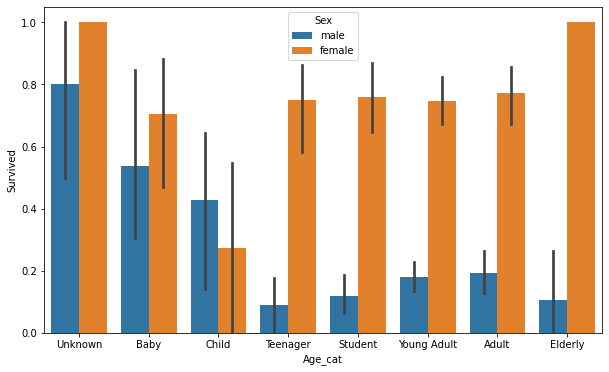

In [ ]:
#막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

#x축의 값을 순차적으로 표시하기 위한 설정
group_names=['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

#lambda 식에 위에서 생성한 get_category() 함수를 반환값으로지정.
#get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)



---



#####**데이터 전처리**

In [ ]:
from sklearn import preprocessing 

def encode_features(dataDF):
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=preprocessing.LabelEncoder()
    le=le.fit(dataDF[feature])
    dataDF[feature]=le.transform(dataDF[feature])
  return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [ ]:
#Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

#레이블 인코딩 수행
def format_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  features=['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le=preprocessing.LabelEncoder()
    le=le.fit(df[feature])
    df[feature]=le.transform(df[feature])
  return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

In [ ]:
#원본 데이터 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df=pd.read_csv('/content/drive/MyDrive/ESAA/22-2/DATA/titanic_train.csv')
y_titanic_df=titanic_df['Survived'] #survived 속성만 별도 분리해 클래스 결정값 데이터로 만들기
X_titanic_df=titanic_df.drop('Survived', axis=1) #survived 속성 drop해 피처 데이터 세트 만들기
#데이터 가공
X_titanic_df=transform_features(X_titanic_df) 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

#####**생존자 예측**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

#RandomForestClassifier 
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

#LogisticRegression
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8492


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#####**교차검증**

In [ ]:
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
  #폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
  kfold=KFold(n_splits=folds)
  scores=[]

  #KFold 교차검증 수행
  for iter_count,(train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    #X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    #Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train,y_train)
    predictions=clf.predict(X_test)
    accuracy=accuracy_score(y_test,predictions)
    scores.append(accuracy)
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count,accuracy))

  #5개 fold에서의 평균 정확도 계산
  mean_score = np.mean(scores)
  print("평균 정확도: {0:.4f}".format(mean_score))

#exec_kfold 호출
exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [ ]:
#cross_val_score : Stratified KFold
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count,accuracy in enumerate(scores):
  print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count,accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [ ]:
#GridSearchCV

from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10],
            'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

grid_dclf=GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터:',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test,dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy) )

#테스트용 데이터 세트가 작아 예측 성능이 많이 증가함

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715
